In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("./data/consumption.csv", parse_dates=["Start", "End"], date_format="%Y-%m-%dT%H:%M:%S%z", sep=", ")
df.head()

/var/folders/vr/fcpvsfqx4lvgx3dffz044w2m0000gn/T/ipykernel_7543/2783499076.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("./data/consumption.csv", parse_dates=["Start", "End"], date_format="%Y-%m-%dT%H:%M:%S%z", sep=", ")


,Consumption (kWh),Start,End
0,0.296,2024-03-19 00:00:00+00:00,2024-03-19 00:30:00+00:00
1,0.238,2024-03-19 00:30:00+00:00,2024-03-19 01:00:00+00:00
2,0.018,2024-03-19 01:00:00+00:00,2024-03-19 01:30:00+00:00
3,0.012,2024-03-19 01:30:00+00:00,2024-03-19 02:00:00+00:00
4,0.009,2024-03-19 02:00:00+00:00,2024-03-19 02:30:00+00:00


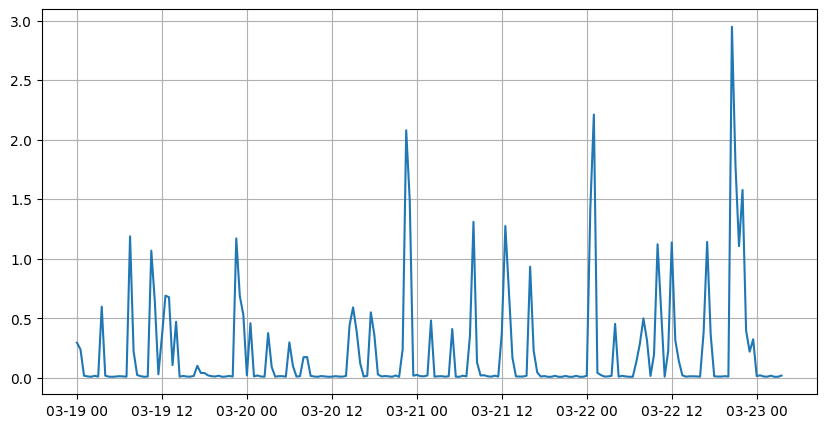

In [55]:
plt.figure(figsize=(10,5))
plt.plot(df["Start"][0:200], df["Consumption (kWh)"][0:200])
plt.grid()
plt.show()

In [77]:
import json

with open("./data/AGILE-24-04-03_Pricing_Electric_Page2.json") as f:
    data = json.load(f)

In [78]:
# Build dataframe with the pricing data
pricing = pd.DataFrame(columns=["price_exc_vat", "price_inc_vat", "valid_from", "valid_to"])

In [79]:
for item in data['results']:
    # Add new row
    pricing.loc[len(pricing)] = [item['value_exc_vat'], item['value_inc_vat'], item['valid_from'], item['valid_to']]

In [80]:
pricing.head()

,price_exc_vat,price_inc_vat,valid_from,valid_to
0,17.22,18.0810,2024-07-24T19:30:00Z,2024-07-24T20:00:00Z
1,18.06,18.9630,2024-07-24T19:00:00Z,2024-07-24T19:30:00Z
2,17.77,18.6585,2024-07-24T18:30:00Z,2024-07-24T19:00:00Z
3,18.88,19.8240,2024-07-24T18:00:00Z,2024-07-24T18:30:00Z
4,29.48,30.9540,2024-07-24T17:30:00Z,2024-07-24T18:00:00Z


In [81]:
# Parse dates from strings to datetime objects
pricing['valid_from'] = pd.to_datetime(pricing['valid_from'], utc=True)
pricing['valid_to'] = pd.to_datetime(pricing['valid_to'], utc=True)

# Calculate the midpoint between 'start_time' and 'end_time'
pricing['valid_mid'] = pricing['valid_from'] + (pricing['valid_to'] - pricing['valid_from']) / 2

In [82]:
pricing.set_index('valid_from', inplace=True)
pricing.head()

,price_exc_vat,price_inc_vat,valid_to,valid_mid
valid_from,,,,
2024-07-24 19:30:00+00:00,17.22,18.0810,2024-07-24 20:00:00+00:00,2024-07-24 19:45:00+00:00
2024-07-24 19:00:00+00:00,18.06,18.9630,2024-07-24 19:30:00+00:00,2024-07-24 19:15:00+00:00
2024-07-24 18:30:00+00:00,17.77,18.6585,2024-07-24 19:00:00+00:00,2024-07-24 18:45:00+00:00
2024-07-24 18:00:00+00:00,18.88,19.8240,2024-07-24 18:30:00+00:00,2024-07-24 18:15:00+00:00
2024-07-24 17:30:00+00:00,29.48,30.9540,2024-07-24 18:00:00+00:00,2024-07-24 17:45:00+00:00


In [85]:
df.set_index('Start', inplace=True)

In [86]:
df.tail()

,Consumption (kWh),End
Start,,
2024-07-23 22:30:00+01:00,0.161,2024-07-23 23:00:00+01:00
2024-07-23 23:00:00+01:00,0.032,2024-07-23 23:30:00+01:00
2024-07-23 23:30:00+01:00,0.022,2024-07-24 00:00:00+01:00
2024-07-24 00:00:00+01:00,0.041,2024-07-24 00:30:00+01:00
2024-07-24 00:30:00+01:00,0.025,2024-07-24 01:00:00+01:00


In [88]:
# Align my smart meter data to the pricing data
data = df.join(pricing, how='inner')
data.head()

,Consumption (kWh),End,price_exc_vat,price_inc_vat,valid_to,valid_mid
2024-07-23 23:30:00+00:00,0.025,2024-07-24 01:00:00+01:00,14.91,15.6555,2024-07-24 00:00:00+00:00,2024-07-23 23:45:00+00:00
2024-07-23 23:00:00+00:00,0.041,2024-07-24 00:30:00+01:00,17.85,18.7425,2024-07-23 23:30:00+00:00,2024-07-23 23:15:00+00:00
2024-07-23 22:30:00+00:00,0.022,2024-07-24 00:00:00+01:00,17.81,18.7005,2024-07-23 23:00:00+00:00,2024-07-23 22:45:00+00:00
2024-07-23 22:00:00+00:00,0.032,2024-07-23 23:30:00+01:00,19.74,20.7270,2024-07-23 22:30:00+00:00,2024-07-23 22:15:00+00:00
2024-07-23 21:30:00+00:00,0.161,2024-07-23 23:00:00+01:00,15.75,16.5375,2024-07-23 22:00:00+00:00,2024-07-23 21:45:00+00:00


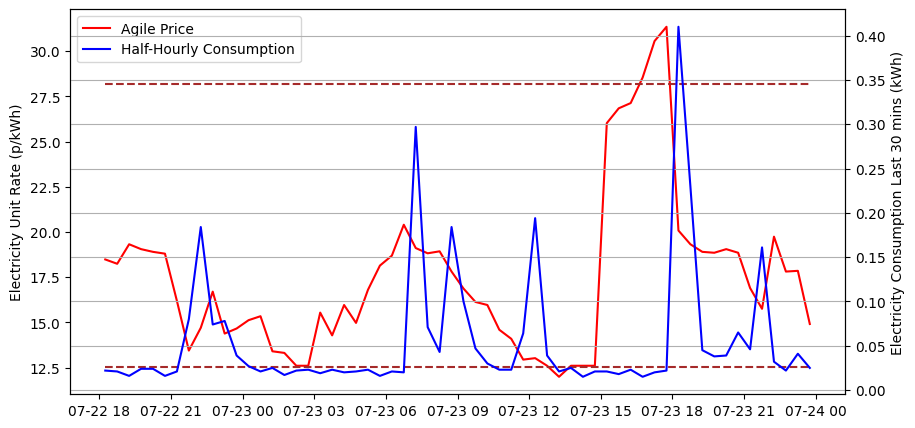

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
line1, = ax.plot(data["valid_mid"], data["price_exc_vat"], color="red", label="Agile Price")
axs = ax.twinx()
line2, = axs.plot(data['valid_mid'], data['Consumption (kWh)'], color='blue', label="Half-Hourly Consumption")
ax.set_ylabel("Electricity Unit Rate (p/kWh)")
axs.set_ylabel("Electricity Consumption Last 30 mins (kWh)")
ax.hlines([28.17, 12.51], xmin=data['valid_mid'].iloc[len(data)-1], xmax=data['valid_mid'].iloc[0], color='brown', linestyle='--')

# Create a combined legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='best')

plt.grid()
plt.show()